In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset = pd.read_csv('Data.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Country      10 non-null object
Age          9 non-null float64
Salary       9 non-null float64
Purchased    10 non-null object
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [4]:
dataset.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [5]:
dataset.isnull()

,Country,Age,Salary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


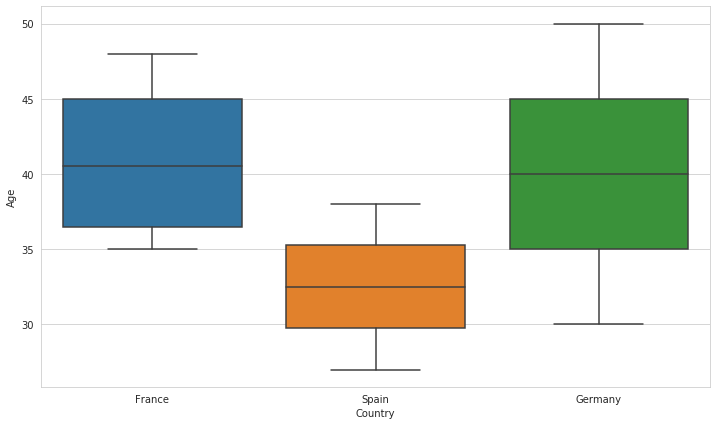

In [6]:
sns.set_style('whitegrid')

plt.figure(figsize = (12,7))

sns.boxplot(data = dataset , x = 'Country' , y = 'Age')

In [7]:
def age(arr):
    
    country = arr[0]
    age = arr[1]
    
    if pd.isnull(age):
        
        if country == 'France':
            return 40.5
        elif country == 'Spain':
            return 33
        elif country == 'Germany':
            return 40
        
    else :
        return age
    

In [8]:
dataset['Age'] = dataset[['Country' , 'Age']].apply(age , axis = 1)

In [9]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,33.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


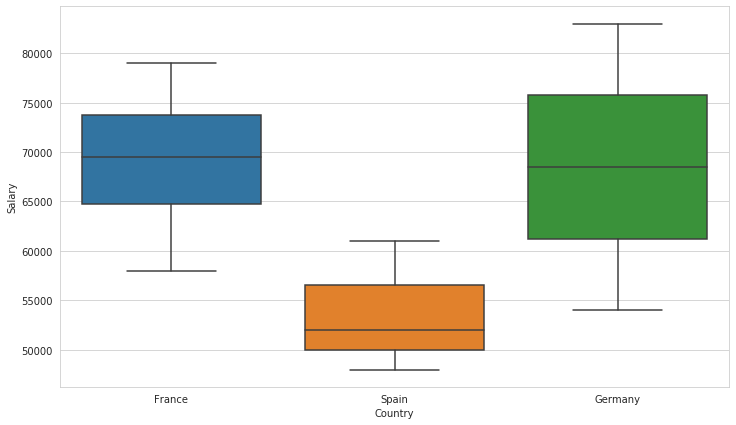

In [10]:
sns.set_style('whitegrid')

plt.figure(figsize = (12,7))

sns.boxplot(data = dataset , x = 'Country' , y = 'Salary')

In [11]:
g = dataset['Salary'].groupby(dataset['Country']).mean()

ds = pd.DataFrame(data = g)

ds

,Salary
Country,
France,69000.000000
Germany,68500.000000
Spain,53666.666667


In [12]:
def salary(arr):
    
    country = arr[0]
    salary = arr[1]
    
    if pd.isnull(salary):
        
        if country == 'France':
            return 69000.00
        elif country == 'Spain':
            return 53666.66
        elif country == 'Germany':
            return 68500.00
        
    else :
        return salary
    

In [13]:
dataset['Salary'] = dataset[['Country' , 'Salary']].apply(salary , axis = 1)

In [14]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,68500.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,33.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [15]:
X = dataset[['Country', 'Age', 'Salary']]
y = dataset['Purchased']

In [16]:
country = pd.get_dummies(X['Country'])
country

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
5,1,0,0
6,0,0,1
7,1,0,0
8,0,1,0
9,1,0,0


In [17]:
res = pd.get_dummies(dataset['Purchased'])
res

,No,Yes
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
5,0,1
6,1,0
7,0,1
8,1,0
9,0,1


In [18]:
X1 = pd.concat([X ,country ], axis = 1)

In [19]:
X1.drop('Country' , axis = 1 , inplace = True)

In [47]:
X1

,Age,Salary,France,Germany,Spain
0,44.0,72000.0,1,0,0
1,27.0,48000.0,0,0,1
2,30.0,54000.0,0,1,0
3,38.0,61000.0,0,0,1
4,40.0,68500.0,0,1,0
5,35.0,58000.0,1,0,0
6,33.0,52000.0,0,0,1
7,48.0,79000.0,1,0,0
8,50.0,83000.0,0,1,0
9,37.0,67000.0,1,0,0


In [20]:
y = res
y

,No,Yes
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
5,0,1
6,1,0
7,0,1
8,1,0
9,0,1


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train , X_test , y_train , y_test = train_test_split(X1 , y , test_size = 0.3 , random_state = 101)

In [23]:
np.shape(X_train)

(7, 5)

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [25]:
X_train = sc.fit_transform(X_train)
# fit and then transform the dataset


X_test = sc.transform(X_test)
# transfrom the dataset according to the previious fit